In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [35]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",
    sep=" ",
    header=None
)


In [36]:
df.columns = [
    "Status_of_existing_checking_account",
    "Duration_in_month",
    "Credit_history",
    "Purpose",
    "Credit_amount",
    "Savings_account/bonds",
    "Present_employment_since",
    "Installment_rate_in_percentage_of_disposable_income",
    "Personal_status_and_sex",
    "Other_debtors/guarantors",
    "Present_residence_since",
    "Property",
    "Age_in_years",
    "Other_installment_plans",
    "Housing",
    "Number_of_existing_credits_at_this_bank",
    "Job",
    "Number_of_people_being_liable_to_provide_maintenance_for",
    "Telephone",
    "Foreign_worker",
    "Target"   # ← column 21 (values 1 or 2)
]


In [37]:
df['Risk'] = df['Target'].map({1: "Good", 2: "Bad"})
df.drop(columns=['Target'], inplace=True)


In [38]:
df.head()
df.info()
df['Risk'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status_of_existing_checking_account                       1000 non-null   object
 1   Duration_in_month                                         1000 non-null   int64 
 2   Credit_history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings_account/bonds                                     1000 non-null   object
 6   Present_employment_since                                  1000 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64 
 8   Personal_status_and_sex      

Risk
Good    700
Bad     300
Name: count, dtype: int64

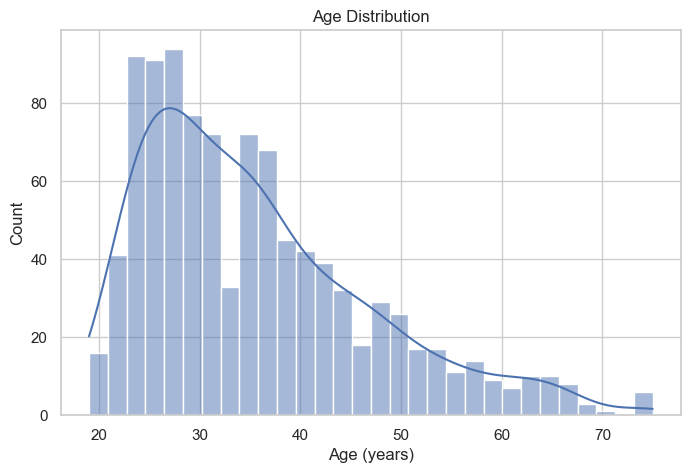

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(df['Age_in_years'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.show()


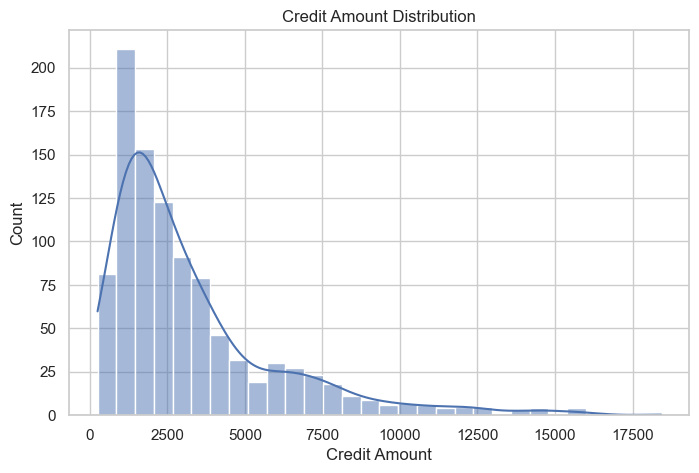

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df['Credit_amount'], kde=True, bins=30)
plt.title("Credit Amount Distribution")
plt.xlabel("Credit Amount")
plt.show()


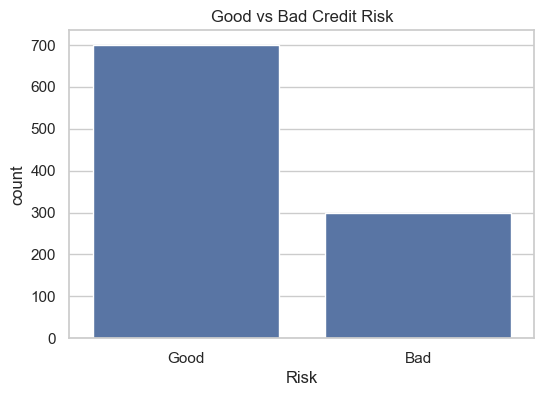

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='Risk', data=df)
plt.title("Good vs Bad Credit Risk")
plt.show()


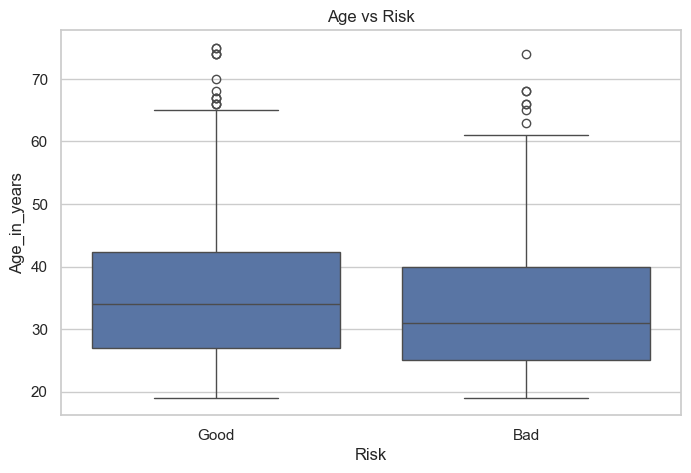

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Risk', y='Age_in_years', data=df)
plt.title("Age vs Risk")
plt.show()


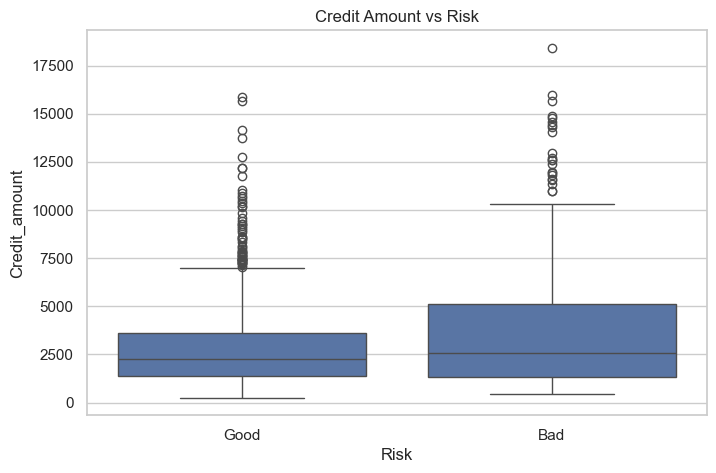

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Risk', y='Credit_amount', data=df)
plt.title("Credit Amount vs Risk")
plt.show()


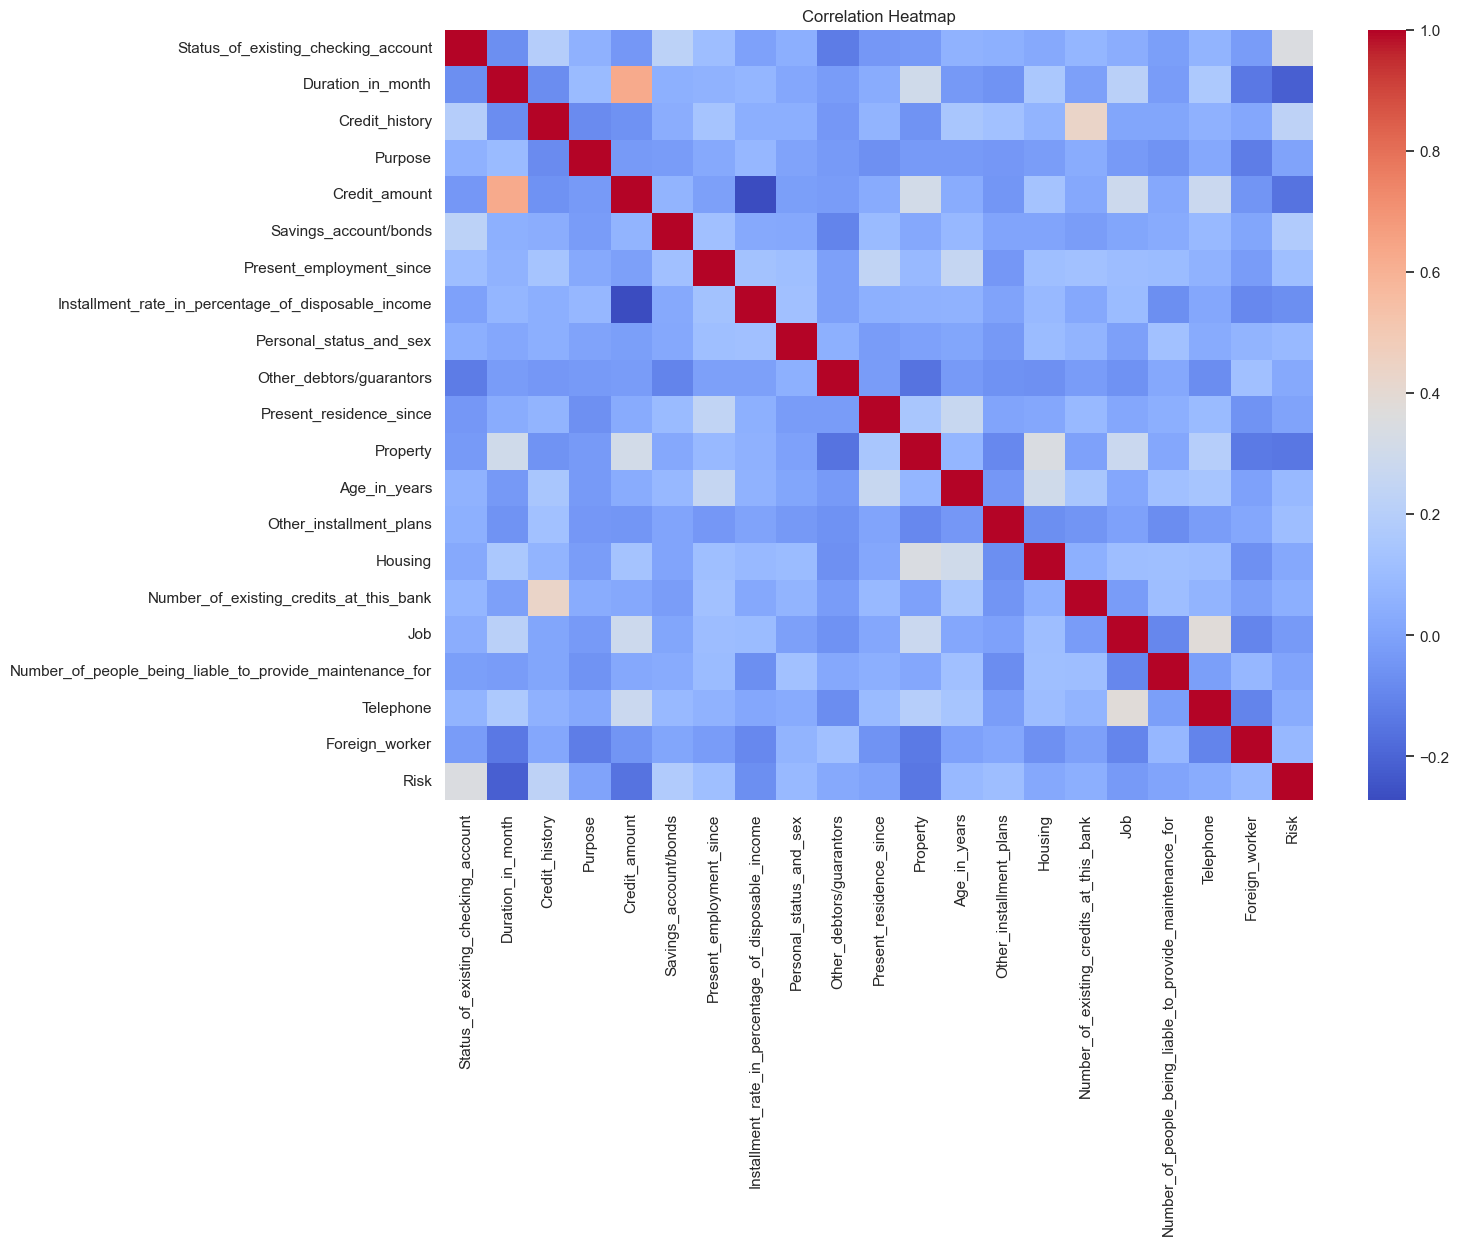

In [45]:
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()
